<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/M_Piramu_Unsupervised_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Concept         | Meaning                                                             |
| --------------- | ------------------------------------------------------------------- |
| Eigenvalue (λ)  | Amount of stretching/compression                                    |
| Eigenvector (v) | Direction of stretching                                             |
| Role in PCA     | Find the most informative directions in data (principal components) |




Eigenvalues and eigenvectors are fundamental concepts in linear algebra used to understand the behavior of linear transformations. Given a square matrix A, an eigenvector v is a non-zero vector that, when multiplied by A, results in a scaled version of itself, i.e., A⋅v=λ⋅v, where λ is the corresponding eigenvalue. Eigenvectors represent directions, and eigenvalues indicate the magnitude of stretching or shrinking along those directions. In Principal Component Analysis (PCA), these concepts are crucial: PCA computes the eigenvectors and eigenvalues of the covariance matrix of the dataset. The eigenvectors (called principal components) define the new feature space, while eigenvalues indicate the amount of variance captured by each component. By selecting the top eigenvectors with the largest eigenvalues, PCA reduces the dimensionality of data while preserving as much variance as possible, making it useful for data compression and visualization.

In [2]:
#b)	Use the Students' Social Network Profile Clustering dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab.
#import library and upload dataset

import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('/content/Clustering_Marketing.csv')

# Display first few rows
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [3]:
#Data Summary and info
# Dataset shape
print("Shape:", df.shape)

# Basic info
df.info()

# Summary statistics
df.describe()


Shape: (15000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot         

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


In [4]:
# Check for Missing Values
# Missing values
print(df.isnull().sum())


gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64


/tmp/ipython-input-5-2347738355.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-5-2347738355.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

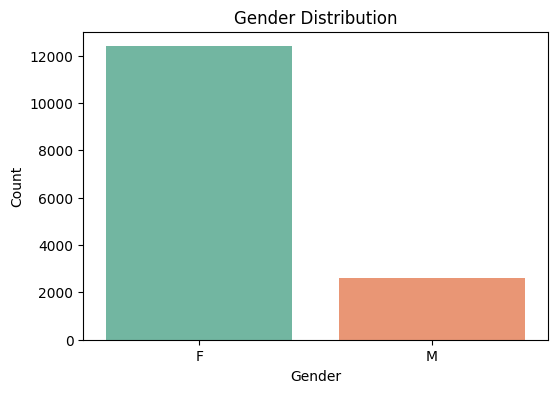

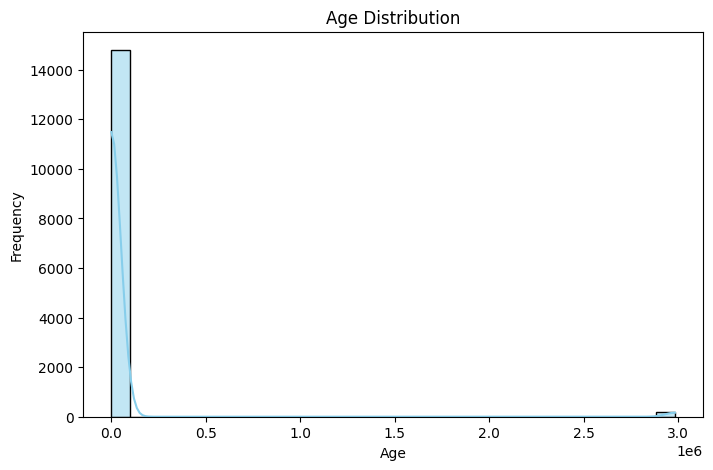

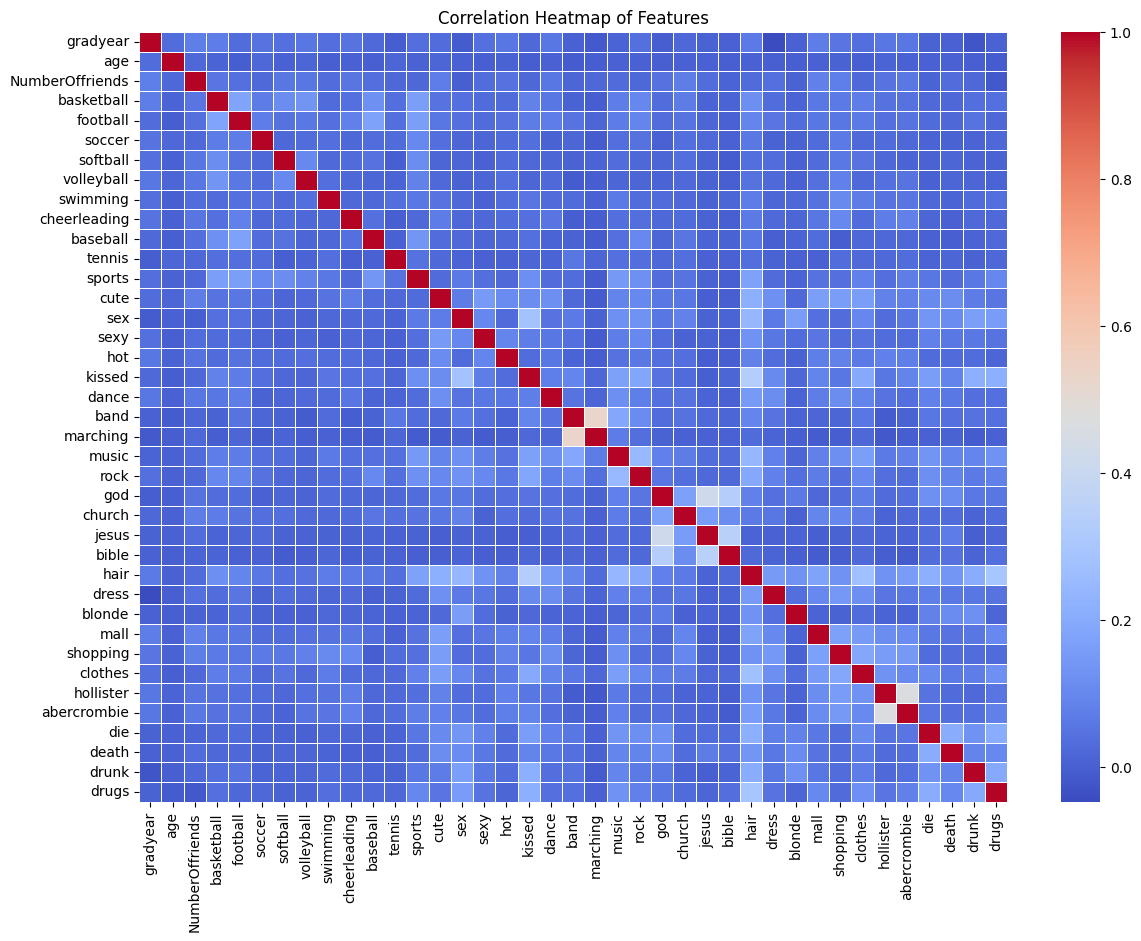

In [5]:
# ii EDA and Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# 3. Convert 'age' to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 4. Handle Missing Values
df['age'].fillna(df['age'].median(), inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

# 5. Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 6. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 7. Correlation Heatmap (excluding 'gender')
plt.figure(figsize=(14,10))
sns.heatmap(df.drop(columns=['gender']).corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Top 10 most skewed features:
 blonde      117.250830
sex          49.972125
bible        21.417635
jesus        19.160195
swimming     16.380904
kissed       12.866542
drugs        12.508258
marching     11.670519
god          11.490218
tennis       11.236150
dtype: float64


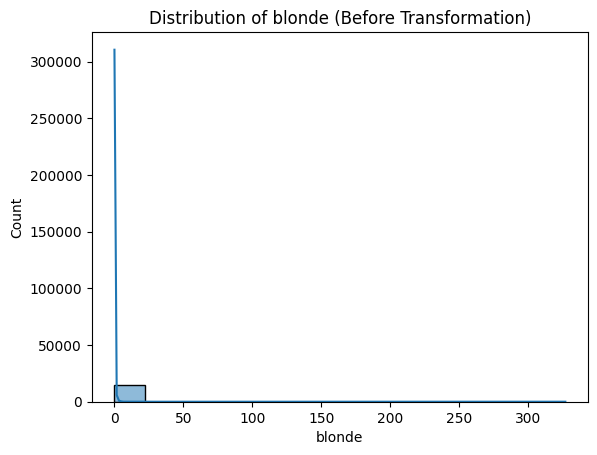

In [6]:
#iii.	Check the distributions/skewness in the variables and do the transformations if required.
import numpy as np
import pandas as pd

# Drop non-numeric columns like 'gender'
numeric_df = df.drop(columns=['gender']).select_dtypes(include=[np.number])

# Calculate skewness
skew_values = numeric_df.skew().sort_values(ascending=False)
print("Top 10 most skewed features:\n", skew_values.head(10))

# Visualize distribution (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing most skewed feature
top_skewed = skew_values.index[0]
sns.histplot(df[top_skewed], kde=True)
plt.title(f'Distribution of {top_skewed} (Before Transformation)')
plt.show()


In [8]:
#vi.	Try out all the 3 clustering methods (K-Mean, Hierarchical, DBSCAN) and compare their silhoutte scores.
# Required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Load and clean the dataset
#df = pd.read_csv('/content/Clustering_Marketing.csv')

# Fix 'age' column and handle missing values
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

# Encode 'gender'
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# Select numeric columns
X = df.select_dtypes(include=[np.number])

# Handle outliers using IQR (clipping)
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X[col] = np.clip(X[col], lower, upper)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Clustering Models ----

# 1. KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

# 2. Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=4)
hier_labels = hier.fit_predict(X_scaled)
hier_score = silhouette_score(X_scaled, hier_labels)

# 3. DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
valid = dbscan_labels != -1  # remove noise for scoring

if len(np.unique(dbscan_labels[valid])) > 1:
    dbscan_score = silhouette_score(X_scaled[valid], dbscan_labels[valid])
else:
    dbscan_score = -1  # Invalid silhouette score

# ---- Print Scores ----
print("\nSilhouette Score Comparison:")
print(f"KMeans Clustering       : {kmeans_score:.3f}")
print(f"Hierarchical Clustering : {hier_score:.3f}")
print(f"DBSCAN Clustering       : {dbscan_score:.3f}")


/tmp/ipython-input-8-3821148844.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-8-3821148844.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'


Silhouette Score Comparison:
KMeans Clustering       : 0.236
Hierarchical Clustering : 0.167
DBSCAN Clustering       : -1.000


In [10]:
#i.	Download the dataset from above link and load it into your Python environment.
anime_data=pd.read_csv('/content/anime.csv')
rating_data=pd.read_csv('/content/rating.csv')
## print shape of dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())
print (rating_data.info())


The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1048575 non-null  int64
 1   anime_id  1048575 non-null  int64
 2   rating    1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB
None


In [11]:
#ii.	Merge two dataset.
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


/tmp/ipython-input-12-3493137271.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
/tmp/ipython-input-12-3493137271.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")


Text(0, 0.5, 'User Rating count')

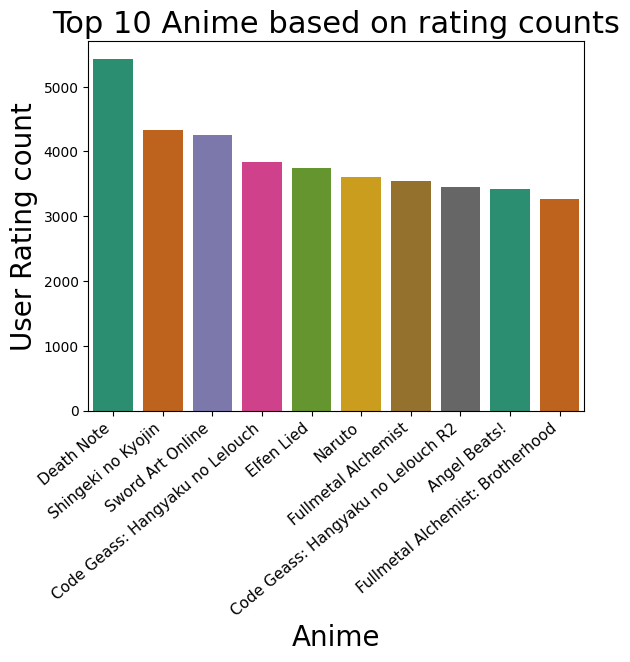

In [12]:
#Top 10 Anime based on rating counts
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )
top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20)
ax.set_ylabel('User Rating count', fontsize = 20)

/tmp/ipython-input-13-3663300661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
/tmp/ipython-input-13-3663300661.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")


Text(0, 0.5, 'Community Size')

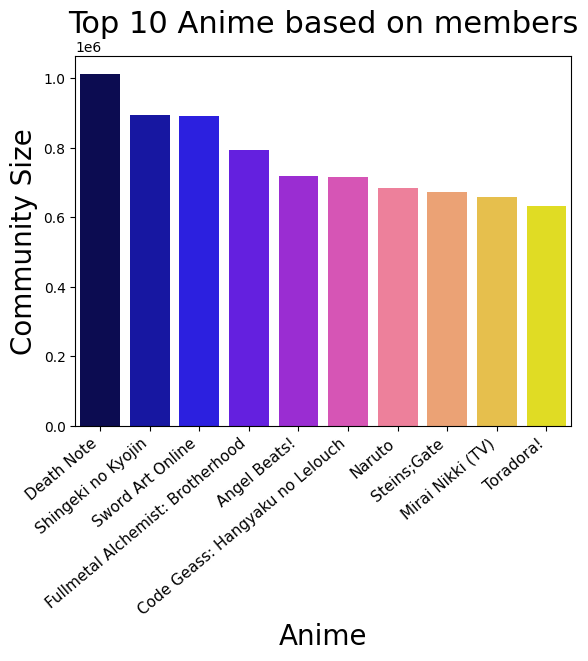

In [13]:
#Top 10 Anime based on Community size
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title",
                     keep = 'first', inplace = True)
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20)
ax.set_ylabel('Community Size', fontsize = 20)

/tmp/ipython-input-29-1690756843.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns={'rating_x': 'user_rating', 'rating_y': 'anime_rating'}, inplace=True)


Merged DataFrame Shape: (854113, 9)


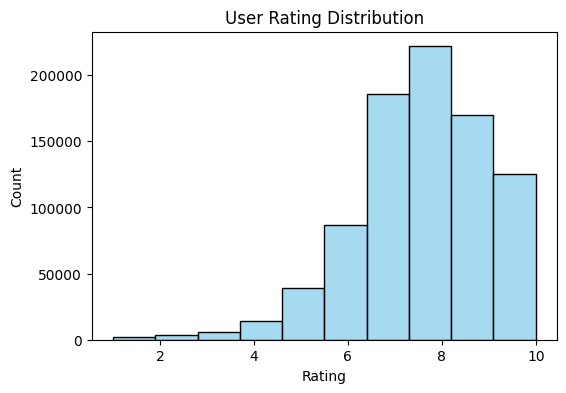

/tmp/ipython-input-29-1690756843.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated_counts.index, x=top_rated_counts.values, palette='magma')


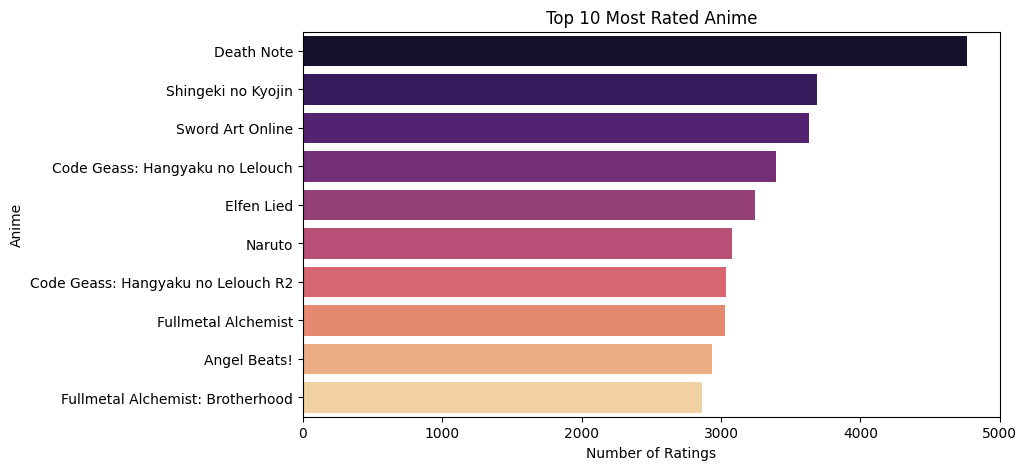

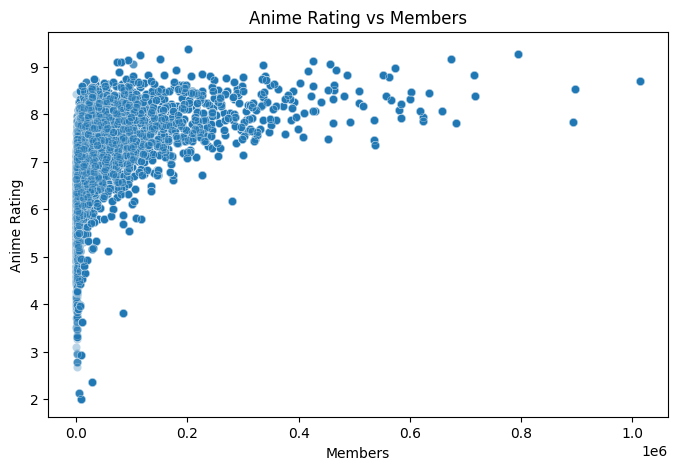

,0
members_log,-0.812729
anime_id_log,-1.004398


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load both datasets
anime_df = pd.read_csv("/content/anime.csv")
rating_df = pd.read_csv("/content/rating.csv")

# Remove duplicates in anime data (optional, safe)
anime_df = anime_df.drop_duplicates(subset='anime_id')

# Merge on anime_id using inner join (only common entries)
merged_df = pd.merge(rating_df, anime_df, on="anime_id", how="inner")

# Optional: filter out ratings marked as -1 (means watched but not rated)
merged_df = merged_df[merged_df['rating_x'] != -1]

# Optional: rename columns for clarity (if needed)
merged_df.rename(columns={'rating_x': 'user_rating', 'rating_y': 'anime_rating'}, inplace=True)

# Show result
print("Merged DataFrame Shape:", merged_df.shape)
merged_df.head()

#EDA
# 1. Distribution of user ratings
plt.figure(figsize=(6, 4))
sns.histplot(merged_df['user_rating'], bins=10, kde=False, color='skyblue')
plt.title("User Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 2. Top 10 Most Rated Anime
top_rated_counts = merged_df['name'].value_counts().head(10)
plt.figure(figsize=(9, 5))
sns.barplot(y=top_rated_counts.index, x=top_rated_counts.values, palette='magma')
plt.title("Top 10 Most Rated Anime")
plt.xlabel("Number of Ratings")
plt.ylabel("Anime")
plt.show()

# 3. Anime Rating vs Number of Members
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='members', y='anime_rating', alpha=0.3)
plt.title("Anime Rating vs Members")
plt.xlabel("Members")
plt.ylabel("Anime Rating")
plt.show()

# --- Skewness Analysis and Transformation ---

# Select numeric columns
numeric_cols = merged_df.select_dtypes(include=[np.number])

# Check skewness
skewness = numeric_cols.skew().sort_values(ascending=False)

# Apply log1p transformation to highly skewed features (|skew| > 1)
transformed_df = merged_df.copy()
for col in skewness.index:
    if abs(skewness[col]) > 1:
        transformed_df[col + "_log"] = np.log1p(transformed_df[col])

# Show transformed skewness
transformed_skewness = transformed_df[[col for col in transformed_df.columns if '_log' in col]].skew()
transformed_skewness


In [30]:
#Recommendation
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Use genre and name from merged anime data
anime_df = pd.read_csv("/content/anime.csv")

# Drop missing genres and reset index
anime_df = anime_df.dropna(subset=['genre']).reset_index(drop=True)

# Fill missing names if any
anime_df['name'].fillna("Unknown", inplace=True)

# Step 2: TF-IDF Vectorizer on genre
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime_df['genre'])

# Step 3: Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Step 4: Build reverse index (anime name → index)
indices = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates()

# Step 5: Recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices.get(title)
    if idx is None:
        return f"'{title}' not found in anime list."

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    anime_indices = [i[0] for i in sim_scores]

    return anime_df[['name', 'genre', 'type']].iloc[anime_indices]

# Step 6: Try example
recommendations = get_recommendations("Death Note")
print(recommendations)

/tmp/ipython-input-30-3342270830.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_df['name'].fillna("Unknown", inplace=True)


                                          name  \
778                         Death Note Rewrite   
981                            Mousou Dairinin   
144              Higurashi no Naku Koro ni Kai   
1383             Higurashi no Naku Koro ni Rei   
445                           Mirai Nikki (TV)   
4162         Mirai Nikki (TV): Ura Mirai Nikki   
334                  Higurashi no Naku Koro ni   
38                                     Monster   
5380                                 AD Police   
2074  Higurashi no Naku Koro ni Kaku: Outbreak   

                                                  genre     type  
778   Mystery, Police, Psychological, Supernatural, ...  Special  
981   Drama, Mystery, Police, Psychological, Superna...       TV  
144      Mystery, Psychological, Supernatural, Thriller       TV  
1383  Comedy, Mystery, Psychological, Supernatural, ...      OVA  
445   Action, Mystery, Psychological, Shounen, Super...       TV  
4162  Action, Comedy, Mystery, Psychological, S